<a href="https://colab.research.google.com/github/david-lab17/clusterigAlgorithm/blob/master/Loan_Limit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as plt 
import seaborn as sns



import datetime 
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import plotly.express as px
#pd.set_option('float_format', '{:2f}'.format)
pd.options.display.float_format = "{:,.2f}".format

pd.set_option('display.max_rows', 100)

%config InlineBackend.figure_format = 'svg'

In [ ]:
file = 'txns.xlsx'


#DATA USED

In [ ]:
df = pd.read_excel(file)
df

,TRANSACTIO_ID,ACCOUNT_NO,DRCR,CREATED_ON,STATUS,AMOUNT
0,043890882181,256772022525001,D,06/APR/22 10:38:47.177641000,0.00,"380,000.00"
1,043890882181,256780225623001,C,06/APR/22 10:38:47.179493000,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,06/APR/22 10:39:34.911677000,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,06/APR/22 10:39:34.915462000,0.00,"2,000.00"
4,LL5861990349,204215453001,D,06/APR/22 11:11:39.133725000,0.00,"200,000.00"
...,...,...,...,...,...,...
435597,051815220625,9030017730915,C,18/MAY/22 15:24:50.741990000,0.00,"25,000.00"
435598,051815220625,256782533304001,D,18/MAY/22 15:24:50.742919000,0.00,830.00
435599,051815220625,9030017730915,C,18/MAY/22 15:24:50.743049000,0.00,830.00
435600,051815220625,256782533304001,D,18/MAY/22 15:24:50.743600000,0.00,125.00


#DATA PREPROCESSING
##This is the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.drop_duplicates(subset=['account_no'])

,transactio_id,account_no,drcr,created_on,status,amount
0,043890882181,256772022525001,D,06/APR/22 10:38:47.177641000,0.00,"380,000.00"
1,043890882181,256780225623001,C,06/APR/22 10:38:47.179493000,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,06/APR/22 10:39:34.911677000,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,06/APR/22 10:39:34.915462000,0.00,"2,000.00"
4,LL5861990349,204215453001,D,06/APR/22 11:11:39.133725000,0.00,"200,000.00"
...,...,...,...,...,...,...
434027,PNT023097873,207752223499007,C,24/APR/22 14:11:17.071388000,0.00,"2,000.00"
434465,254710180032,256779349837001,C,27/APR/22 10:50:45.154661000,0.00,"79,000.00"
434481,316244784316,256772530110001,C,27/APR/22 14:18:27.105631000,0.00,"310,000.00"
434595,184686905186,207772530110007,C,27/APR/22 14:20:26.262173000,0.00,620.00


In [ ]:
print(len(df))


435602


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435602 entries, 0 to 435601
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   transactio_id  435602 non-null  object 
 1   account_no     435602 non-null  int64  
 2   drcr           435602 non-null  object 
 3   created_on     435602 non-null  object 
 4   status         435498 non-null  float64
 5   amount         435602 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.9+ MB


###There are missing value in status column

In [ ]:
df.dropna(inplace = True)


###Cast Account number as object

In [ ]:
df['account_no'] = df['account_no'].astype('object')

In [ ]:
df

,transactio_id,account_no,drcr,created_on,status,amount
0,043890882181,256772022525001,D,06/APR/22 10:38:47.177641000,0.00,"380,000.00"
1,043890882181,256780225623001,C,06/APR/22 10:38:47.179493000,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,06/APR/22 10:39:34.911677000,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,06/APR/22 10:39:34.915462000,0.00,"2,000.00"
4,LL5861990349,204215453001,D,06/APR/22 11:11:39.133725000,0.00,"200,000.00"
...,...,...,...,...,...,...
435597,051815220625,9030017730915,C,18/MAY/22 15:24:50.741990000,0.00,"25,000.00"
435598,051815220625,256782533304001,D,18/MAY/22 15:24:50.742919000,0.00,830.00
435599,051815220625,9030017730915,C,18/MAY/22 15:24:50.743049000,0.00,830.00
435600,051815220625,256782533304001,D,18/MAY/22 15:24:50.743600000,0.00,125.00


In [ ]:
df.describe()

,status,amount
count,"435,498.00","435,498.00"
mean,"3,469.63","196,914.02"
std,"101,407.50","791,567.43"
min,0.00,1.00
25%,0.00,"1,000.00"
50%,0.00,"5,000.00"
75%,0.00,"70,000.00"
max,"3,006,201.00","186,000,000.00"


In [ ]:
df[df['amount']<0]


,transactio_id,account_no,drcr,created_on,status,amount


### Our data has zero Negative amount transacted but we will pick only positive amount (future use)

In [ ]:
df = df[df['amount']>0]


In [ ]:
##Remove time from date
pd.to_datetime(df['created_on']).dt.date
#change date format to yy/mm/dd
df['created_on'] = pd.to_datetime(df['created_on'])

In [ ]:
print(len(df['status'].unique()))


19


#FEATURE ENGINEERING
-Derive new features per every Transactional Account
# Clustering Based on RFM Segmentation
##RFM Segmentation
###Recency: how long since the customer last transaction
###Frequency: how often has the customer transacted across a particular period of time
###Monetary value: how much the customer has DR or CR across a particular period of time



In [ ]:
#Create a new df that aggregates customer information 
customer_profile = (df[['account_no','transactio_id','amount']]
                    .drop_duplicates(subset=['transactio_id'], keep='last'))

In [ ]:
#Getting frequency and monetary value of customer 
customer_profile =  pd.DataFrame(customer_profile.groupby(['account_no']).agg({'transactio_id':'count',
                                                                    'amount':'sum'}))

In [ ]:
#Cast account no as string instead of float 
customer_profile.reset_index(inplace = True)
customer_profile['account_no'] = customer_profile['account_no'].astype('object')

In [ ]:
customer_profile

,account_no,transactio_id,amount
0,90950001001,9,"18,590.00"
1,114500001001,2318,"1,078,844,349.00"
2,204213534001,6,"3,003,000.00"
3,204213580001,454,"8,771,000.00"
4,204213589001,20,"10,517,000.00"
...,...,...,...
8431,256789966029001,10,"1,593,000.00"
8432,256789973726001,1,"18,123.00"
8433,256789992894001,1,"2,000.00"
8434,256789993948001,2,"3,470,000.00"


In [ ]:
df['created_on'].max()


Timestamp('2022-05-19 00:00:51.683928')

In [ ]:
#Calculate time since last transaction, assume today is last date in dataframe 
time_since_last_transaction = (df[['account_no','transactio_id','created_on']]
                            .sort_values(['created_on'])
                            .drop_duplicates(subset=['account_no'], keep='last'))

In [ ]:
date_today = datetime.datetime.strptime('2022-05-19 00:00:51','%Y-%m-%d %H:%M:%S')


In [ ]:
time_since_last_transaction['last_transaction'] = (time_since_last_transaction['created_on']
                                             .apply(lambda x: date_today-x)
                                             .apply(lambda x:x.days))

In [ ]:
customer_profile = customer_profile.merge(time_since_last_transaction[['account_no','last_transaction']], on='account_no')


In [ ]:
customer_profile

,account_no,transactio_id,amount,last_transaction
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
customer_profile.columns = ['account_no','Frequency','Monetary_Value','Recency']


In [ ]:
customer_profile['Monetary_Value'].sum()


38194986807.0

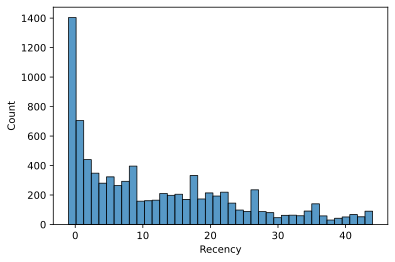

In [ ]:
sns.histplot(customer_profile.Recency, bins=40)


In [ ]:
X = customer_profile[['Frequency','Monetary_Value','Recency']].copy()
#converting into an array 
X = X.values

In [ ]:
X = customer_profile[['Frequency','Monetary_Value','Recency']].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# range_n_clusters = [3, 4, 5, 6,7,8,9]

In [ ]:
customer_profile[['Frequency_raw','Monetary_Value_raw','Recency_raw']] = customer_profile[['Frequency','Monetary_Value','Recency']].copy()

X = customer_profile[['Frequency','Monetary_Value','Recency']].copy()

for column in X.columns:
    mean = customer_profile[column].mean()
    std = customer_profile[column].std()
    customer_profile[column] = (customer_profile[column]-mean)/std  
   # customer_profile[column] = customer_profile[column].apply(lambda x:replace_outliers(x)) 


customer_profile.dropna(inplace = True)

In [ ]:
# customer_profile['clusters'] = km.labels_


In [ ]:
customer_profile

,account_no,Frequency,Monetary_Value,Recency,Frequency_raw,Monetary_Value_raw,Recency_raw
0,90950001001,-0.01,-0.03,0.68,9,"18,590.00",20
1,114500001001,2.96,6.72,-1.02,2318,"1,078,844,349.00",0
2,204213534001,-0.02,-0.01,0.09,6,"3,003,000.00",13
3,204213580001,0.56,0.03,-1.02,454,"8,771,000.00",0
4,204213589001,0.00,0.04,-0.85,20,"10,517,000.00",2
...,...,...,...,...,...,...,...
8431,256789966029001,-0.01,-0.02,-1.02,10,"1,593,000.00",0
8432,256789973726001,-0.02,-0.03,1.54,1,"18,123.00",30
8433,256789992894001,-0.02,-0.03,-1.02,1,"2,000.00",0
8434,256789993948001,-0.02,-0.01,0.00,2,"3,470,000.00",12


In [ ]:
# customer_profile.groupby('clusters').describe().transpose()

In [ ]:
customer_profile.drop(columns=['Frequency','Monetary_Value','Recency'], inplace = True)
customer_profile

,account_no,Frequency_raw,Monetary_Value_raw,Recency_raw
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
customer_profile.columns=['account_no','Frequency','Monetary_Value','Recency',]
customer_profile

,account_no,Frequency,Monetary_Value,Recency
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
# fig = px.scatter_3d(customer_profile, x='Frequency',
#                     y='Recency', z='Monetary_Value',
#                     color='Clusters', color_continuous_scale='sunset')
# fig.show()

In [ ]:
Avg_Transaction= customer_profile["Monetary_Value"]/customer_profile["Frequency"]
customer_profile["Avg_Transaction"]=Avg_Transaction
# Loan_Limit= customer_profile["Monetary_Value"]*0.1
# customer_profile["Loan_Limit"]=Loan_Limit
customer_profile

,account_no,Frequency,Monetary_Value,Recency,Avg_Transaction
0,90950001001,9,"18,590.00",20,"2,065.56"
1,114500001001,2318,"1,078,844,349.00",0,"465,420.34"
2,204213534001,6,"3,003,000.00",13,"500,500.00"
3,204213580001,454,"8,771,000.00",0,"19,319.38"
4,204213589001,20,"10,517,000.00",2,"525,850.00"
...,...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0,"159,300.00"
8432,256789973726001,1,"18,123.00",30,"18,123.00"
8433,256789992894001,1,"2,000.00",0,"2,000.00"
8434,256789993948001,2,"3,470,000.00",12,"1,735,000.00"


In [ ]:
# customerid_cluster = customer_profile[['account_no','Clusters','Avg_Transaction','Loan_Limit']]

In [ ]:
# df = df.merge(customerid_cluster, on='account_no', how='left')
# df

In [ ]:
# file_name = 'txnOutput1.xlsx'
# # saving the excel
# # customer_profile.to_excel(file_name)

In [ ]:
# saving the excel
# customer_profile.to_excel(file_name)


In [ ]:
df

,transactio_id,account_no,drcr,created_on,status,amount
0,043890882181,256772022525001,D,2022-04-06 10:38:47.177641,0.00,"380,000.00"
1,043890882181,256780225623001,C,2022-04-06 10:38:47.179493,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,2022-04-06 10:39:34.911677,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,2022-04-06 10:39:34.915462,0.00,"2,000.00"
4,LL5861990349,204215453001,D,2022-04-06 11:11:39.133725,0.00,"200,000.00"
...,...,...,...,...,...,...
435597,051815220625,9030017730915,C,2022-05-18 15:24:50.741990,0.00,"25,000.00"
435598,051815220625,256782533304001,D,2022-05-18 15:24:50.742919,0.00,830.00
435599,051815220625,9030017730915,C,2022-05-18 15:24:50.743049,0.00,830.00
435600,051815220625,256782533304001,D,2022-05-18 15:24:50.743600,0.00,125.00


In [ ]:
df_final = pd.pivot_table(df, values='amount', index=['account_no'],
               columns=['drcr'], aggfunc='sum').fillna(0).reset_index().rename_axis(index=None, columns=None)
              

df_final['Balance'] = df_final['C'] - df_final['D']

In [ ]:
df_final

,account_no,C,D,Balance
0,90950001001,"18,590.00",0.00,"18,590.00"
1,114500001001,"923,808,934.00","9,438,532,577.00","-8,514,723,643.00"
2,204213534001,"3,003,000.00","3,001,500.00","1,500.00"
3,204213580001,"8,638,000.00","8,638,000.00",0.00
4,204213589001,"10,407,000.00","10,407,000.00",0.00
...,...,...,...,...
8977,256789970398001,0.00,"60,000.00","-60,000.00"
8978,256789973726001,"18,123.00","18,000.00",123.00
8979,256789992894001,"2,000.00",700.00,"1,300.00"
8980,256789993948001,"3,470,000.00","3,005,175.00","464,825.00"


In [ ]:
# df_final.columns = ['ACCOUNT_NO','CR','DR','BALANCE']


In [ ]:
df_final.sort_values("Balance",ascending=False,inplace=True)
df_final


,account_no,C,D,Balance
827,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00"
8944,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00"
6227,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00"
8432,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00"
4109,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00"
...,...,...,...,...
5268,256774016196001,0.00,"6,994,250.00","-6,994,250.00"
8807,256788978486001,"47,000,000.00","54,005,000.00","-7,005,000.00"
3699,256752534770001,"524,000.00","12,169,919.00","-11,645,919.00"
316,204229740001,"62,391,600.00","102,376,600.00","-39,985,000.00"


In [ ]:
df_final.columns = ['account_no','CR','DR','BALANCE']


In [ ]:
# df_final = df_final.groupby(["ACCOUNT_NO"]).sum()

In [ ]:
df_final

,account_no,CR,DR,BALANCE
827,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00"
8944,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00"
6227,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00"
8432,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00"
4109,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00"
...,...,...,...,...
5268,256774016196001,0.00,"6,994,250.00","-6,994,250.00"
8807,256788978486001,"47,000,000.00","54,005,000.00","-7,005,000.00"
3699,256752534770001,"524,000.00","12,169,919.00","-11,645,919.00"
316,204229740001,"62,391,600.00","102,376,600.00","-39,985,000.00"


In [ ]:
# customer_profile.drop('Clusters',axis=1,inplace=True)

In [ ]:
customer_profile



,account_no,Frequency,Monetary_Value,Recency,Avg_Transaction
0,90950001001,9,"18,590.00",20,"2,065.56"
1,114500001001,2318,"1,078,844,349.00",0,"465,420.34"
2,204213534001,6,"3,003,000.00",13,"500,500.00"
3,204213580001,454,"8,771,000.00",0,"19,319.38"
4,204213589001,20,"10,517,000.00",2,"525,850.00"
...,...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0,"159,300.00"
8432,256789973726001,1,"18,123.00",30,"18,123.00"
8433,256789992894001,1,"2,000.00",0,"2,000.00"
8434,256789993948001,2,"3,470,000.00",12,"1,735,000.00"


In [ ]:
df_full_join = pd.merge(
    df_final, customer_profile, on=["account_no"]
)

In [ ]:
df_full_join

,account_no,CR,DR,BALANCE,Frequency,Monetary_Value,Recency,Avg_Transaction
0,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00",70920,"14,556,264,469.00",0,"205,249.08"
1,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00",11,"22,360,694.00",0,"2,032,790.36"
2,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00",9,"23,641,291.00",4,"2,626,810.11"
3,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00",8,"21,603,643.00",1,"2,700,455.38"
4,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00",6,"13,213,744.00",0,"2,202,290.67"
...,...,...,...,...,...,...,...,...
8431,208600019001,"22,037,750.00","28,738,250.00","-6,700,500.00",8,"22,037,750.00",2,"2,754,718.75"
8432,256788978486001,"47,000,000.00","54,005,000.00","-7,005,000.00",14,"47,000,000.00",1,"3,357,142.86"
8433,256752534770001,"524,000.00","12,169,919.00","-11,645,919.00",6,"533,000.00",0,"88,833.33"
8434,204229740001,"62,391,600.00","102,376,600.00","-39,985,000.00",55,"60,941,600.00",0,"1,108,029.09"


In [ ]:
# df_full_join['Recency']=df_full_join['Recency'].astype(np.int64)
# df_full_join['Frequency']=df_full_join['Frequency'].astype(np.int64)
# df_full_join['DR']=df_full_join['DR'].astype(np.int64)
# df_full_join['CR']=df_full_join['CR'].astype(np.int64)
# df_full_join['BALANCE']=df_full_join['BALANCE'].astype(np.int64)
# df_full_join['Monetary_Value']=df_full_join['Monetary_Value'].astype(np.int64)
# df_full_join['Avg_Transaction']=df_full_join['Avg_Transaction'].astype(np.int64)



#OUTLIERS
##Detecting outlier using Z score and Removing them from our Data
###Using Z score
####Formula for Z score = (Observation — Mean)/Standard Deviation

####z = (X — μ) / σ



In [ ]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std .all()
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
# outlier_pt=detect_outliers(df_full_join)


In [ ]:
df_full_join.describe().T

,count,mean,std,min,25%,50%,75%,max
CR,"8,436.00","5,079,500.15","209,833,834.45",0.00,"4,000.00","60,000.00","641,875.00","19,184,868,886.00"
DR,"8,436.00","5,074,121.26","156,916,557.00",0.00,0.00,"50,000.00","602,867.75","10,776,175,801.00"
BALANCE,"8,436.00","5,378.88","130,299,920.16","-8,514,723,643.00",0.00,100.00,"4,000.00","8,408,693,085.00"
Frequency,"8,436.00",19.84,777.18,1.00,1.00,3.00,7.00,"70,920.00"
Monetary_Value,"8,436.00","4,527,618.16","159,875,667.24",20.00,"4,000.00","58,000.00","627,250.00","14,556,264,469.00"
Recency,"8,436.00",12.00,11.72,-1.00,1.75,8.00,20.00,44.00
Avg_Transaction,"8,436.00","224,560.22","639,107.84",20.00,"2,000.00","17,739.13","143,039.29","21,009,444.40"


In [ ]:
# Let's see if we have duplicated entries in the data
df_full_join.duplicated().sum()

0

In [ ]:
#  df_full_join.drop(['account_no'],axis=1, inplace=True)

In [ ]:
# plt.figure(figsize=(10,50))
# for i in range(len(df_full_join.columns)):
#   plt.subplot(17, 1, i+1)
#   sns.distplot(df_full_join[df_full_join.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
#   plt.title(df_full_join.columns[i])

# plt.tight_layout()

In [ ]:
df_full_join.head()

,account_no,CR,DR,BALANCE,Frequency,Monetary_Value,Recency,Avg_Transaction
0,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00",70920,"14,556,264,469.00",0,"205,249.08"
1,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00",11,"22,360,694.00",0,"2,032,790.36"
2,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00",9,"23,641,291.00",4,"2,626,810.11"
3,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00",8,"21,603,643.00",1,"2,700,455.38"
4,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00",6,"13,213,744.00",0,"2,202,290.67"


In [ ]:
# #To Excel
# file_name = 'full_join1.xlsx'
# # saving the excel
# df_full_join.to_excel(file_name)

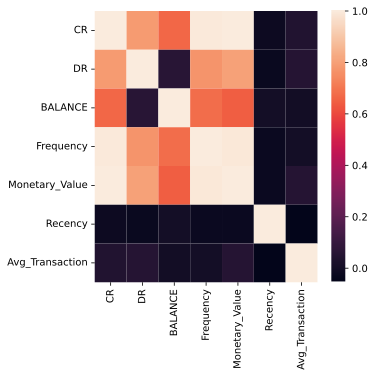

In [ ]:
corr=df_full_join.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
X = df_full_join.copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

#FIND NUMBER OF OPTIMAL CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

###-According to Elbow method the number of cluster is 5.
###-Let's validate this using Silhouette clustering before we arrrive to number of clusters to be used.
###-Silhoutte clustering is a way to validate number of clusters

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


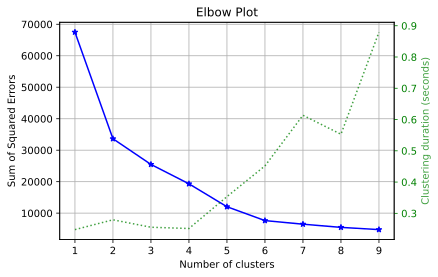

In [ ]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X,cluster_ranges=range(1,10))

In [ ]:
# from sklearn.cluster import KMeans

# wcss=[]
# for i in range(1,15):
#     kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1,15),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

#VALIDATING NUMBER OF CLUSTERS TO BE USED
###The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.



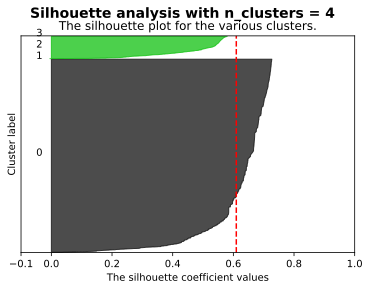

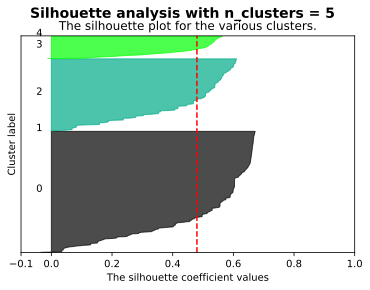

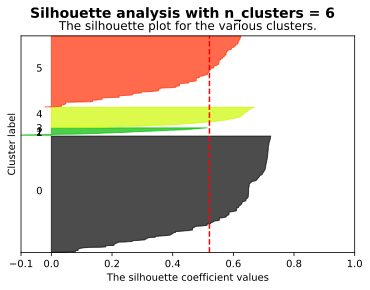

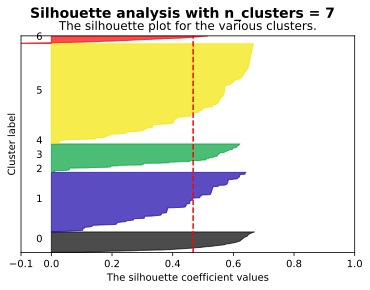

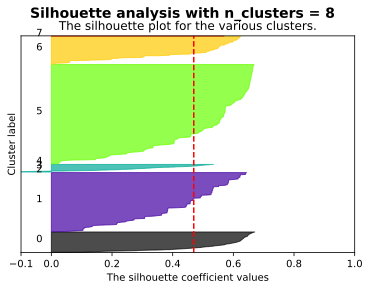

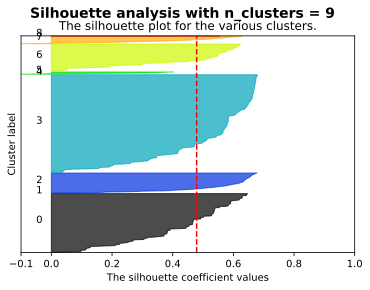

In [ ]:
range_n_clusters = range(4,10)
eval_scores = {'model':[],'n_clusters':[], 's_score':[], 'c_score':[], 'db_score':[]}

for n_clusters in range_n_clusters:

    fig=plt.figure()
    ax=plt.axes()
    
    ax.set_xlim([-0.1, 1])

    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=77, init='k-means++')
    eval_scores['model'].append('KMeans')
    
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels, random_state = 77)
   
    eval_scores['n_clusters'].append(n_clusters)
    eval_scores['s_score'].append(silhouette_avg)
    eval_scores['c_score'].append(metrics.calinski_harabasz_score(X, cluster_labels))
    eval_scores['db_score'].append(metrics.davies_bouldin_score(X, cluster_labels))
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
# fig.savefig('silhouette.png')


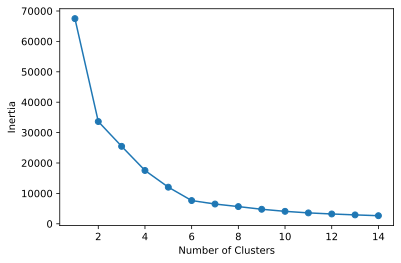

In [ ]:
#Checking inertia for k-means 
inertia = []
list_num_clusters = list(range(1,15))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=1)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [ ]:
X

array([[-2.74205967e+00,  9.14100737e+01,  6.86462942e+01, ...,
         9.10244796e+01, -1.02322110e+00, -3.02175819e-02],
       [ 5.03592490e-01,  8.23614468e-02,  3.80200946e-02, ...,
         1.11550014e-01, -1.02322110e+00,  2.82947133e+00],
       [ 5.03426118e-01,  8.84647185e-02,  5.84265314e-02, ...,
         1.19560444e-01, -6.82019321e-01,  3.75897792e+00],
       ...,
       [ 5.03104366e-01, -2.17113231e-02,  4.52228782e-02, ...,
        -2.49872605e-02, -1.02322110e+00, -2.12381898e-01],
       [-2.85767746e+00,  2.73147070e-01,  6.20127335e-01, ...,
         3.52882504e-01, -1.02322110e+00,  1.38242902e+00],
       [-2.85885292e+00,  4.37862604e+00,  6.01212377e+01, ...,
         6.72009962e+00, -1.02322110e+00,  3.76891622e-01]])

#K-MEANS METHOD TO TRAIN THE MODEL

In [ ]:
km = KMeans(n_clusters=5,random_state=1)
km.fit(X)
labels = km.labels_


In [ ]:
df_full_join.columns

Index(['account_no', 'CR', 'DR', 'BALANCE', 'Frequency', 'Monetary_Value',
       'Recency', 'Avg_Transaction'],
      dtype='object')

In [ ]:
km.cluster_centers_.shape

(5, 8)

In [ ]:
df_full_join.head()

,account_no,CR,DR,BALANCE,Frequency,Monetary_Value,Recency,Avg_Transaction
0,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00",70920,"14,556,264,469.00",0,"205,249.08"
1,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00",11,"22,360,694.00",0,"2,032,790.36"
2,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00",9,"23,641,291.00",4,"2,626,810.11"
3,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00",8,"21,603,643.00",1,"2,700,455.38"
4,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00",6,"13,213,744.00",0,"2,202,290.67"


In [ ]:
# # In order to understand what these numbers mean, let's perform inverse transformation
# cluster_centers = scaler.inverse_transform(cluster_centers)
# cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_full_join.columns])
# cluster_centers

In [ ]:
# concatenate the clusters labels to our original dataframe
full_join_df = pd.concat([df_full_join, pd.DataFrame({'cluster':labels})], axis = 1)
# full_join_df_cluster.drop("Clusters",axis=1,inplace=True)


In [ ]:
full_join_df.columns=full_join_df.columns.str.lower()
full_join_df.head()

,account_no,cr,dr,balance,frequency,monetary_value,recency,avg_transaction,cluster
0,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00",70920,"14,556,264,469.00",0,"205,249.08",1
1,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00",11,"22,360,694.00",0,"2,032,790.36",0
2,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00",9,"23,641,291.00",4,"2,626,810.11",0
3,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00",8,"21,603,643.00",1,"2,700,455.38",0
4,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00",6,"13,213,744.00",0,"2,202,290.67",0


In [ ]:
full_join_df.columns = ['account_no','credit','debit','balance','frequency','monetary_value','recency','avg_transaction','cluster']
full_join_df.head()


,account_no,credit,debit,balance,frequency,monetary_value,recency,avg_transaction,cluster
0,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00",70920,"14,556,264,469.00",0,"205,249.08",1
1,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00",11,"22,360,694.00",0,"2,032,790.36",0
2,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00",9,"23,641,291.00",4,"2,626,810.11",0
3,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00",8,"21,603,643.00",1,"2,700,455.38",0
4,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00",6,"13,213,744.00",0,"2,202,290.67",0


#Statistics to each cluster
### This Statistics will help the loan Provider to understand characteristics of each cluster thus make decision on loan amount give to particular Account

In [ ]:
full_join_df.groupby('cluster').describe().transpose()

cluster                            0                 1             2  \
credit          count       4,744.00              1.00      2,821.00   
                mean    2,079,555.28 19,184,868,886.00    274,990.10   
                std     8,638,576.59               NaN  1,340,353.97   
                min             0.00 19,184,868,886.00          0.00   
                25%        10,000.00 19,184,868,886.00        500.00   
                50%       131,680.00 19,184,868,886.00      8,000.00   
                75%       871,000.00 19,184,868,886.00     83,000.00   
                max   200,029,314.00 19,184,868,886.00 35,853,045.00   
debit           count       4,744.00              1.00      2,821.00   
                mean    2,043,964.73 10,776,175,801.00    275,407.43   
                std     8,651,451.31               NaN  1,344,180.03   
                min             0.00 10,776,175,801.00          0.00   
                25%         1,000.00 10,776,175,801.00          0.00   
                50%       112,000.00 10,776,175,801.00      1,000.00   
                75%       805,469.50 10,776,175,801.00     74,500.00   
                max   200,641,713.00 10,776,175,801.00 35,853,045.00   
balance         count       4,744.00              1.00      2,821.00   
                mean       35,590.55  8,408,693,085.00       -417.34   
                std       548,351.19               NaN    207,973.17   
                min   -11,645,919.00  8,408,693,085.00 -6,010,000.00   
                25%             0.00  8,408,693,085.00          0.00   
                50%           500.00  8,408,693,085.00         90.00   
                75%         8,655.00  8,408,693,085.00      2,000.00   
                max    11,320,944.00  8,408,693,085.00  6,697,343.00   
frequency       count       4,744.00              1.00      2,821.00   
                mean           11.54         70,920.00          2.40   
                std            29.78               NaN          3.46   
                min             1.00         70,920.00          1.00   
                25%             2.00         70,920.00          1.00   
                50%             4.00         70,920.00          1.00   
                75%            11.00         70,920.00          2.00   
                max           792.00         70,920.00         67.00   
monetary_value  count       4,744.00              1.00      2,821.00   
                mean    2,028,515.58 14,556,264,469.00    269,132.45   
                std     8,355,883.57               NaN  1,297,528.07   
                min            20.00 14,556,264,469.00         20.00   
                25%        10,000.00 14,556,264,469.00        500.00   
                50%       130,000.00 14,556,264,469.00      7,000.00   
                75%       850,000.00 14,556,264,469.00     81,000.00   
                max   193,501,903.00 14,556,264,469.00 36,791,895.00   
recency         count       4,744.00              1.00      2,821.00   
                mean            4.58              0.00         25.16   
                std             4.55               NaN          7.96   
                min            -1.00              0.00         15.00   
                25%             0.00              0.00         19.00   
                50%             3.00              0.00         23.00   
                75%             8.00              0.00         31.00   
                max            20.00              0.00         44.00   
avg_transaction count       4,744.00              1.00      2,821.00   
                mean      219,804.03        205,249.08    118,638.96   
                std       538,455.21               NaN    435,266.37   
                min            20.00        205,249.08         20.00   
                25%         2,000.00        205,249.08        500.00   
                50%        29,443.40        205,249.08      2,750.00   
                75%       160,000.00    

#ASSIGNING LOAN AMOUNT TO EACH CLUSTER BASED WITH PROVIDER'S ABILITY

In [ ]:
#use numpy Select()
conditions=[full_join_df['cluster'].eq(0),
            full_join_df['cluster'].eq(1),
            full_join_df['cluster'].eq(2),
            full_join_df['cluster'].eq(3),
            full_join_df['cluster'].eq(4)]
choices=[5000,4000,3000,2000,1000]
full_join_df['loan_limit']=np.select(conditions,choices,default=full_join_df['cluster'])

#FINAL DATA 

In [ ]:
full_join_df

,account_no,credit,debit,balance,frequency,monetary_value,recency,avg_transaction,cluster,loan_limit
0,9030017730915,"19,184,868,886.00","10,776,175,801.00","8,408,693,085.00",70920,"14,556,264,469.00",0,"205,249.08",1,4000
1,256789796169001,"22,360,694.00","11,039,750.00","11,320,944.00",11,"22,360,694.00",0,"2,032,790.36",0,5000
2,256777096050001,"23,641,291.00","14,241,668.00","9,399,623.00",9,"23,641,291.00",4,"2,626,810.11",0,5000
3,256786694074001,"21,603,643.00","12,651,773.00","8,951,870.00",8,"21,603,643.00",1,"2,700,455.38",0,5000
4,256770740768001,"13,213,744.00","4,760,050.00","8,453,694.00",6,"13,213,744.00",0,"2,202,290.67",0,5000
...,...,...,...,...,...,...,...,...,...,...
8431,208600019001,"22,037,750.00","28,738,250.00","-6,700,500.00",8,"22,037,750.00",2,"2,754,718.75",3,2000
8432,256788978486001,"47,000,000.00","54,005,000.00","-7,005,000.00",14,"47,000,000.00",1,"3,357,142.86",0,5000
8433,256752534770001,"524,000.00","12,169,919.00","-11,645,919.00",6,"533,000.00",0,"88,833.33",0,5000
8434,204229740001,"62,391,600.00","102,376,600.00","-39,985,000.00",55,"60,941,600.00",0,"1,108,029.09",3,2000


In [ ]:
#To Excel
file_name = 'transaction.xlsx'
# saving the excel
full_join_df_cluster.to_excel(file_name)